In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer ,IterativeImputer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from collections import defaultdict
from matplotlib import pyplot as plt 
#import pycountry_convert as pc
sns.set_theme('poster')
sns.set_style('white')

data = pd.read_csv("/content/drive/MyDrive/data/cust_seg.csv")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
data.isnull().sum()

Unnamed: 0                    0
fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

In [4]:
new_names= {'fecha_dato':'Date',
'ncodpers':	'Customer code',
'ind_empleado':	'Employee index',
'pais_residencia':	'Customer Country residence',
'sexo':	'Customers sex',
'age':	'Age',
'fecha_alta':'The date contract in the bank',
'ind_nuevo':'New customer Index', 
'antiguedad':	'Customer seniority', 
'indrel':	'Primary at the end of the month',
'ult_fec_cli_1t':	'Last date as primary customer',
'indrel_1mes':	'Customer type at the beginning of the month',
'tiprel_1mes':	'Customer relation type at the beginning of the month',
'indresi':	'Residence index',
'indext':	'Foreigner index',
'conyuemp':	'Spouse index',
'canal_entrada':'channel used by the customer to join',
'indfall':	'Deceased index',
'tipodom':	'primary address',
'cod_prov':	'Province code',
'nomprov':	'Province name',
'ind_actividad_cliente': 'Activity index',
'renta':'Gross income of the household',
'ind_ahor_fin_ult1':	'Saving Account',
'ind_aval_fin_ult1':	'Guarantees',
'ind_cco_fin_ult1':	'Current Accounts',
'ind_cder_fin_ult1':'Derivada Account',
'ind_cno_fin_ult1':	'Payroll Account',
'ind_ctju_fin_ult1':	'Junior Account',
'ind_ctma_fin_ult1':	'Más particular Account',
'ind_ctop_fin_ult1':	'particular Account',
'ind_ctpp_fin_ult1':	'particular Plus Account',
'ind_deco_fin_ult1':	'Short-term deposits',
'ind_deme_fin_ult1':	'Medium-term deposits',
'ind_dela_fin_ult1': 'Long-term deposits',
'ind_ecue_fin_ult1':'e-account',
'ind_fond_fin_ult1':'Funds',
'ind_hip_fin_ult1':	'Mortgage',
'ind_plan_fin_ult1':'Pensions',
'ind_pres_fin_ult1':'Loans',
'ind_reca_fin_ult1':'Taxes',
'ind_tjcr_fin_ult1':'Credit Card',
'ind_valo_fin_ult1':'Securities',
'ind_viv_fin_ult1':	'Home Account',
'ind_nomina_ult1':	'Payroll',
'ind_nom_pens_ult1':'Pensions',
'ind_recibo_ult1':	'Direct Debit'}

In [5]:
data.rename(columns=new_names, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Unnamed: 0                                            1000000 non-null  int64  
 1   Date                                                  1000000 non-null  object 
 2   Customer code                                         1000000 non-null  int64  
 3   Employee index                                        989218 non-null   object 
 4   Customer Country residence                            989218 non-null   object 
 5   Customers sex                                         989214 non-null   object 
 6   Age                                                   1000000 non-null  object 
 7   The date contract in the bank                         989218 non-null   object 
 8   New customer Index               

In [7]:
# columns dropped because of large number of missing values 
drop_columns=['Last date as primary customer','Spouse index']
data.drop(drop_columns,axis=1,inplace=True)

In [8]:
data.isnull().sum()

Unnamed: 0                                                   0
Date                                                         0
Customer code                                                0
Employee index                                           10782
Customer Country residence                               10782
Customers sex                                            10786
Age                                                          0
The date contract in the bank                            10782
New customer Index                                       10782
Customer seniority                                           0
Primary at the end of the month                          10782
Customer type at the beginning of the month              10782
Customer relation type at the beginning of the month     10782
Residence index                                          10782
Foreigner index                                          10782
channel used by the customer to join                   

In [9]:
missing_columns = ["Payroll",
"Pensions",
"Gross income of the household", 
"Primary at the end of the month",
"Customer type at the beginning of the month", 
"Customer relation type at the beginning of the month",
"Residence index",                                       
"Foreigner index",                                        
"channel used by the customer to join",                  
"Deceased index",                                      
"primary address",                                         
"Province code",                                           
"Province name",                                           
"Activity index", 
"The date contract in the bank",
"New customer Index",
"Employee index",
"Customer Country residence",
"Customers sex"]

In [10]:

for i in missing_columns:
    print("Column :", i) # print features
    print("no of uniques value:",data[i].nunique())# printing n unique
    #print("counts of unique values:",data[i].value_counts())
    print("******************************")

Column : Payroll
no of uniques value: 2
******************************
Column : Pensions
no of uniques value: Pensions    2
Pensions    2
dtype: int64
******************************
Column : Gross income of the household
no of uniques value: 395668
******************************
Column : Primary at the end of the month
no of uniques value: 2
******************************
Column : Customer type at the beginning of the month
no of uniques value: 3
******************************
Column : Customer relation type at the beginning of the month
no of uniques value: 3
******************************
Column : Residence index
no of uniques value: 2
******************************
Column : Foreigner index
no of uniques value: 2
******************************
Column : channel used by the customer to join
no of uniques value: 156
******************************
Column : Deceased index
no of uniques value: 2
******************************
Column : primary address
no of uniques value: 1
****************

In [11]:
data['Employee index']=data['Employee index'].replace({'A': 'active', 'B': 'ex_employed', 'F': 'filial', 'N': 'not_employee', 'P': 'pasive'})
data['Primary at the end of the month']=data['Primary at the end of the month'].replace({1: 'Primary', 99: 'Not_Primary'} ).astype('object')
data['Customer relation type at the beginning of the month']=data['Customer relation type at the beginning of the month'].replace({'A':'active', 'I' :'inactive', 'P' :'former customer','R': 'Potential'}).astype('object')
data['Customer type at the beginning of the month']=data['Customer type at the beginning of the month'].replace({1: 'Primary', 2: 'co-owner','P': 'Potential',3: 'former_primary', 4:'former_co-owner'}).astype('object')
data['Province code']=data['Province code'].astype('object')
data['Customers sex']=data['Customers sex'].replace({'V':'F','H':'M'})
data[['Residence index','Foreigner index','Deceased index']]=data[['Residence index','Foreigner index','Deceased index']].replace({'N':0,'S':1})

In [12]:
data[['Residence index','Foreigner index','Deceased index']]=data[['Residence index','Foreigner index','Deceased index']].astype("object")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Unnamed: 0                                            1000000 non-null  int64  
 1   Date                                                  1000000 non-null  object 
 2   Customer code                                         1000000 non-null  int64  
 3   Employee index                                        989218 non-null   object 
 4   Customer Country residence                            989218 non-null   object 
 5   Customers sex                                         989214 non-null   object 
 6   Age                                                   1000000 non-null  object 
 7   The date contract in the bank                         989218 non-null   object 
 8   New customer Index               

In [14]:
data["Medium-term deposits"].value_counts()

0    996850
1      3150
Name: Medium-term deposits, dtype: int64

In [15]:
# columns dropped because unique value is  1, 
drop_columns=['primary address']
data.drop(drop_columns,axis=1,inplace=True)

In [16]:
data.head()

,Unnamed: 0,Date,Customer code,Employee index,Customer Country residence,Customers sex,Age,The date contract in the bank,New customer Index,Customer seniority,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit
0,0,2015-01-28,1375586,not_employee,ES,M,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,not_employee,ES,F,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,not_employee,ES,F,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,not_employee,ES,M,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,not_employee,ES,F,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [17]:
data["Medium-term deposits"].value_counts()


0    996850
1      3150
Name: Medium-term deposits, dtype: int64

In [18]:
data["Short-term deposits"].value_counts()

0    997842
1      2158
Name: Short-term deposits, dtype: int64

In [19]:
data["Long-term deposits"].value_counts()

0    933119
1     66881
Name: Long-term deposits, dtype: int64

In [20]:
data['Long-term deposits']=data['Long-term deposits'].replace({0: 0, 1: 3})
data['Short-term deposits']=data['Short-term deposits'].replace({0: 0, 1: 1})
data['Medium-term deposits']=data['Medium-term deposits'].replace({0: 0, 1: 2})

In [21]:
data["Long-term deposits"].value_counts()

0    933119
3     66881
Name: Long-term deposits, dtype: int64

In [22]:
data["Deposit Terms"] = data['Long-term deposits'] + data['Short-term deposits'] + data['Medium-term deposits']

In [23]:
# 0    929606 - no term deposit 
# 3     65322 - long term 
# 1      1762 -  short term 
# 2      1679 - medium term 
# 5      1307 - long and medium term 
# 4       232 - two different types
# 6        92 - two different types of account 

In [24]:
data["Deposit Terms"].value_counts()

0    929606
3     65322
1      1762
2      1679
5      1307
4       232
6        92
Name: Deposit Terms, dtype: int64

In [25]:
drop_columns=['Long-term deposits','Short-term deposits','Medium-term deposits']
data.drop(drop_columns,axis=1,inplace=True)

In [26]:
# Accounts types

In [27]:
data["Current Accounts"].value_counts()

1    749626
0    250374
Name: Current Accounts, dtype: int64

In [28]:
data["Saving Account"].value_counts()

0    999823
1       177
Name: Saving Account, dtype: int64

In [29]:
data["Derivada Account"].value_counts()

0    999409
1       591
Name: Derivada Account, dtype: int64

In [30]:
data["Payroll Account"].value_counts()

0    894704
1    105296
Name: Payroll Account, dtype: int64

In [31]:
data["Junior Account"].value_counts()

0    986377
1     13623
Name: Junior Account, dtype: int64

In [32]:
data["Más particular Account"].value_counts()

0    990106
1      9894
Name: Más particular Account, dtype: int64

In [33]:
data["particular Account"].value_counts()

0    787514
1    212486
Name: particular Account, dtype: int64

In [34]:
data["particular Plus Account"].value_counts()

0    927921
1     72079
Name: particular Plus Account, dtype: int64

In [35]:
data["e-account"].value_counts()

0    893733
1    106267
Name: e-account, dtype: int64

In [36]:
data["Home Account"].value_counts()

0    993558
1      6442
Name: Home Account, dtype: int64

In [37]:
data['Current Accounts']=data['Current Accounts'].replace({0: 0, 1: 1})
data['Payroll Account']=data['Payroll Account'].replace({0: 0, 1: 1})
data['Junior Account']=data['Junior Account'].replace({0: 0, 1: 1})
data['Más particular Account']=data['Más particular Account'].replace({0: 0, 1: 1})
data['particular Account']=data['particular Account'].replace({0: 0, 1: 1})
data['particular Plus Account']=data['particular Plus Account'].replace({0: 0, 1: 1})
data['e-account']=data['e-account'].replace({0: 0, 1: 1})
data['Home Account']=data['Home Account'].replace({0: 0, 1: 1})
data['Saving Account']=data['Saving Account'].replace({0: 0, 1: 1})
data['Derivada Account']=data['Derivada Account'].replace({0: 0, 1: 1})

In [38]:
data["Accounts_counts"] = data['Derivada Account']+ data['Current Accounts'] + data['Payroll Account']+ data['Junior Account']+ data['Más particular Account']+data['particular Account']+ data['particular Plus Account']+data['e-account']+data['Home Account']+data['Saving Account']

In [39]:
data["Accounts_counts"].value_counts()

1    655049
2    242465
0     59340
3     36806
4      5644
5       668
6        28
Name: Accounts_counts, dtype: int64

In [40]:
# columns dropped because unique value is  1, 
drop_columns=['Current Accounts','Payroll Account','Junior Account','Más particular Account','particular Account','particular Plus Account','e-account','Home Account','Saving Account','Derivada Account']
data.drop(drop_columns,axis=1,inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Unnamed: 0                                            1000000 non-null  int64  
 1   Date                                                  1000000 non-null  object 
 2   Customer code                                         1000000 non-null  int64  
 3   Employee index                                        989218 non-null   object 
 4   Customer Country residence                            989218 non-null   object 
 5   Customers sex                                         989214 non-null   object 
 6   Age                                                   1000000 non-null  object 
 7   The date contract in the bank                         989218 non-null   object 
 8   New customer Index               

In [42]:
data["Customer type at the beginning of the month"].value_counts()

Primary           989175
former_primary        41
co-owner               2
Name: Customer type at the beginning of the month, dtype: int64

In [43]:
data["Primary at the end of the month"].value_counts()

Primary        988117
Not_Primary      1101
Name: Primary at the end of the month, dtype: int64

In [44]:
data["Customer relation type at the beginning of the month"].value_counts()

active             547800
inactive           441377
former customer        41
Name: Customer relation type at the beginning of the month, dtype: int64

In [45]:
data["Activity index"].value_counts()

1.0    558879
0.0    430339
Name: Activity index, dtype: int64

In [46]:
droped_columns= ["Customer type at the beginning of the month","Primary at the end of the month"]
data.drop(droped_columns,axis=1,inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Unnamed: 0                                            1000000 non-null  int64  
 1   Date                                                  1000000 non-null  object 
 2   Customer code                                         1000000 non-null  int64  
 3   Employee index                                        989218 non-null   object 
 4   Customer Country residence                            989218 non-null   object 
 5   Customers sex                                         989214 non-null   object 
 6   Age                                                   1000000 non-null  object 
 7   The date contract in the bank                         989218 non-null   object 
 8   New customer Index               

In [48]:
data["Residence index"].value_counts()

1.0    982264
0.0      6954
Name: Residence index, dtype: int64

In [49]:
data["Foreigner index"].value_counts()

0.0    946328
1.0     42890
Name: Foreigner index, dtype: int64

In [50]:
data["Deceased index"].value_counts()

0.0    986107
1.0      3111
Name: Deceased index, dtype: int64

In [51]:
data.drop(data[data['Deceased index'] ==1.0].index, inplace = True)

In [52]:
data["Deceased index"].value_counts()

0.0    986107
Name: Deceased index, dtype: int64

In [53]:
droped_columns= ["Guarantees","Pensions","Province code","Employee index"]
data.drop(droped_columns,axis=1,inplace=True)
# pensions columns are repeated 
# guarantees columns has high biased on 0
# Province code is not necesary since we have provience name 

In [54]:
# convert the 'Date' column to datetime format
data['Date']= pd.to_datetime(data['Date'])
#data['The date contract in the bank']= pd.to_datetime(data['The date contract in the bank'])

In [55]:
data["Age"].value_counts()

 22    51017
 23    45366
 24    38992
 21    34014
 44    28774
       ...  
  2       11
115       10
110       10
113        8
116        4
Name: Age, Length: 115, dtype: int64

In [56]:
data["Customer seniority"].value_counts()

     21    34318
     23    23122
     24    20466
     12    19152
     20    18580
           ...  
      0       49
      2       46
      1       37
      3       33
-999999        4
Name: Customer seniority, Length: 249, dtype: int64

In [57]:
data["Customer seniority"].max()

'-999999'

In [58]:
import numpy as np
data[['Age','Customer seniority']]=data[['Age','Customer seniority']].apply(lambda X:X.str.strip()).replace('NA',np.nan).astype('float')

In [59]:
data["Payroll"].value_counts()

0.0    920266
1.0     71222
Name: Payroll, dtype: int64

In [60]:
data.isnull().sum()

Unnamed: 0                                                   0
Date                                                         0
Customer code                                                0
Customer Country residence                               10782
Customers sex                                            10786
Age                                                      10782
The date contract in the bank                            10782
New customer Index                                       10782
Customer seniority                                       10782
Customer relation type at the beginning of the month     10782
Residence index                                          10782
Foreigner index                                          10782
channel used by the customer to join                     10861
Deceased index                                           10782
Province name                                            17714
Activity index                                         

In [61]:
data.shape

(996889, 27)

In [62]:
data.isnull().sum()

Unnamed: 0                                                   0
Date                                                         0
Customer code                                                0
Customer Country residence                               10782
Customers sex                                            10786
Age                                                      10782
The date contract in the bank                            10782
New customer Index                                       10782
Customer seniority                                       10782
Customer relation type at the beginning of the month     10782
Residence index                                          10782
Foreigner index                                          10782
channel used by the customer to join                     10861
Deceased index                                           10782
Province name                                            17714
Activity index                                         

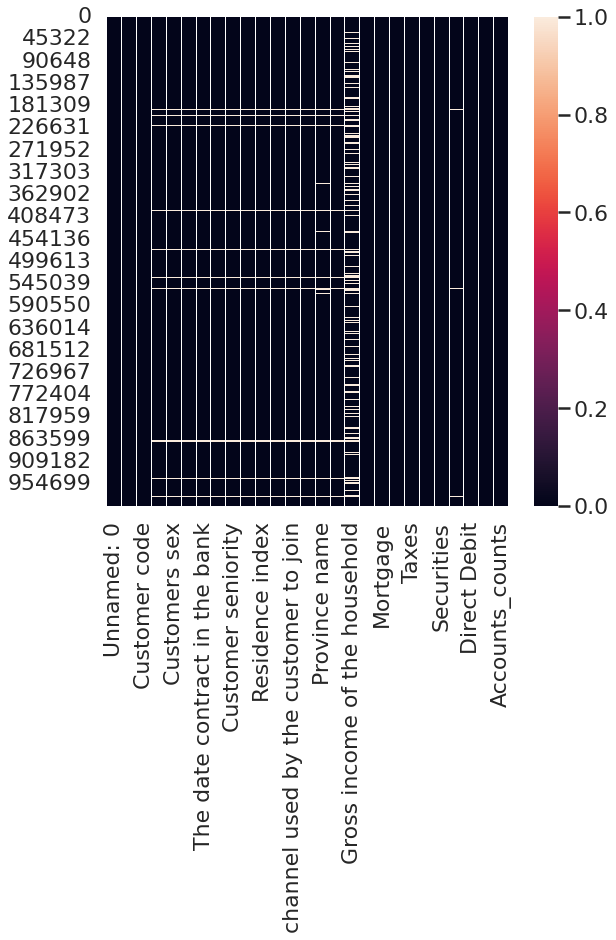

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(data.isnull())

## Changing the date features format

In [64]:
data['Customer seniority'].mask(data['Customer seniority'].lt(0),0,inplace=True)

In [65]:
data=data.astype({'Residence index':float,'Foreigner index':float})

In [66]:
# delet not usefull columns
data.drop(['Unnamed: 0'],axis=1,inplace=True)

# Handling NULL Values

In [67]:
data.isnull().sum()

Date                                                         0
Customer code                                                0
Customer Country residence                               10782
Customers sex                                            10786
Age                                                      10782
The date contract in the bank                            10782
New customer Index                                       10782
Customer seniority                                       10782
Customer relation type at the beginning of the month     10782
Residence index                                          10782
Foreigner index                                          10782
channel used by the customer to join                     10861
Deceased index                                           10782
Province name                                            17714
Activity index                                           10782
Gross income of the household                          

In [68]:
data['The date contract in the bank'] = pd.to_numeric(pd.to_datetime(data['The date contract in the bank']))

In [69]:
drop_columns=['The date contract in the bank']
data.drop(drop_columns,axis=1,inplace=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996889 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   Date                                                  996889 non-null  datetime64[ns]
 1   Customer code                                         996889 non-null  int64         
 2   Customer Country residence                            986107 non-null  object        
 3   Customers sex                                         986103 non-null  object        
 4   Age                                                   986107 non-null  float64       
 5   New customer Index                                    986107 non-null  float64       
 6   Customer seniority                                    986107 non-null  float64       
 7   Customer relation type at the beginning of the month  986107 non-

In [71]:
data['Date'] =data['Date'].apply(pd.Timestamp.timestamp)


In [72]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Customer Country residence']= label_encoder.fit_transform(data['Customer Country residence'])
data['Customer relation type at the beginning of the month']= label_encoder.fit_transform(data['Customer relation type at the beginning of the month'])
data['channel used by the customer to join']= label_encoder.fit_transform(data['channel used by the customer to join'])
data['Province name']= label_encoder.fit_transform(data['Province name'])
data['Customers sex']= label_encoder.fit_transform(data['Customers sex'])
  
  

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(estimator=DecisionTreeClassifier())
imputed = imputer.fit_transform(data)
df_imputed = pd.DataFrame(imputed, columns=data.columns)


In [77]:
df_imputed.isnull().sum()

Date                                                    0
Customer code                                           0
Customer Country residence                              0
Customers sex                                           0
Age                                                     0
New customer Index                                      0
Customer seniority                                      0
Customer relation type at the beginning of the month    0
Residence index                                         0
Foreigner index                                         0
channel used by the customer to join                    0
Deceased index                                          0
Province name                                           0
Activity index                                          0
Gross income of the household                           0
Funds                                                   0
Mortgage                                                0
Loans         

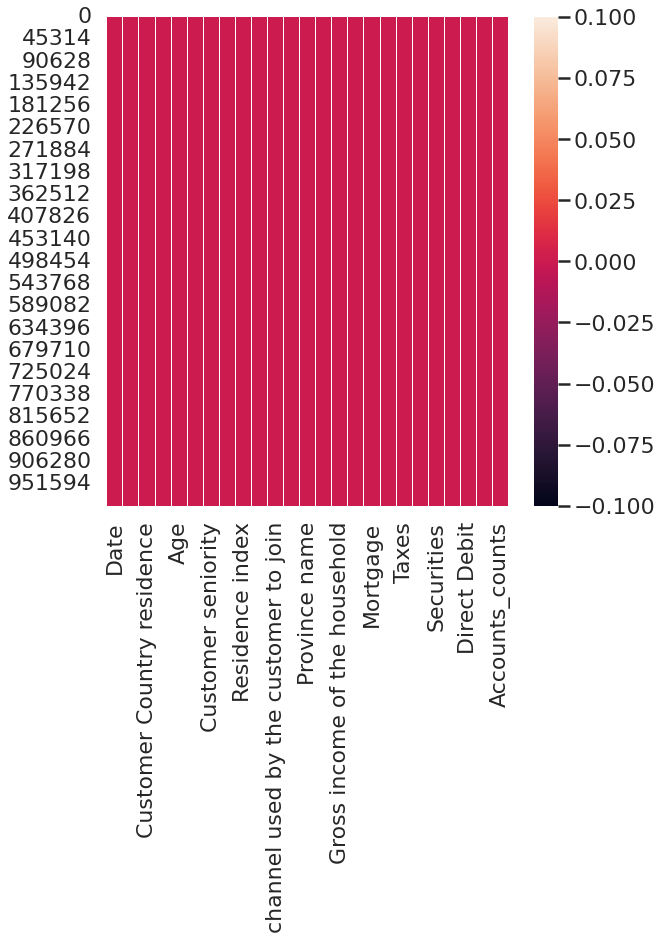

In [78]:
plt.figure(figsize=(9,9))
sns.heatmap(df_imputed.isnull())

In [80]:
df_imputed.to_csv("final.csv")